In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# multivariate linear regression
from sklearn import linear_model
# Hierarchical clustering
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
df1 = pd.read_csv("Country-data.csv")

df1.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data description

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [3]:
df1.shape

(167, 10)

In [4]:
df1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
# are there duplicate values?
format(len(df1[df1.duplicated()]))

'0'

In [6]:
# standard statistical measures
df1.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [7]:
#number of unique countries
df1['country'].nunique()

167

In [8]:
data=df1.drop(['country'],axis=1)

# Data Exploration

## Data distribution 

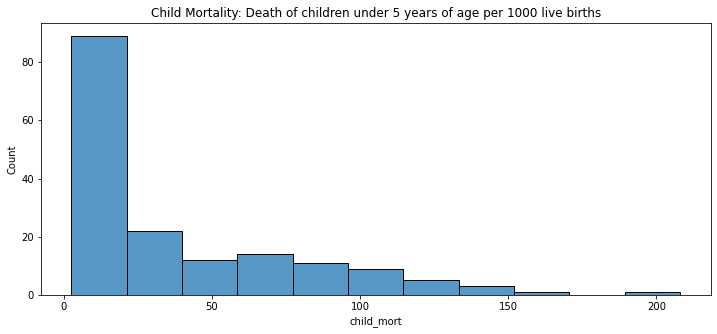

In [9]:
plt.figure(figsize=(12,5))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(data["child_mort"])

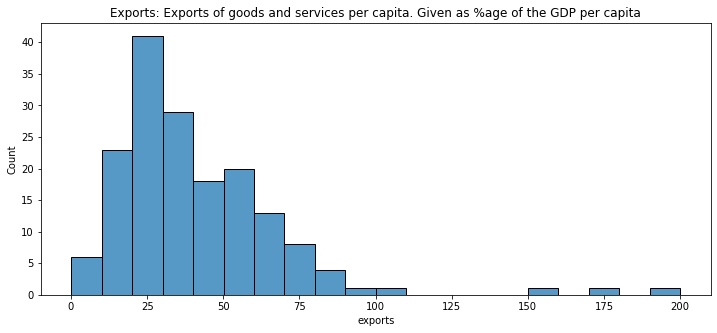

In [10]:
plt.figure(figsize=(12,5))
plt.title("Exports: Exports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data["exports"])

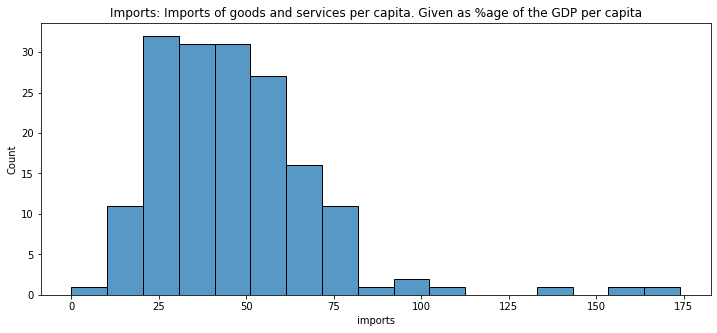

In [11]:
plt.figure(figsize=(12,5))
plt.title("Imports: Imports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data["imports"])

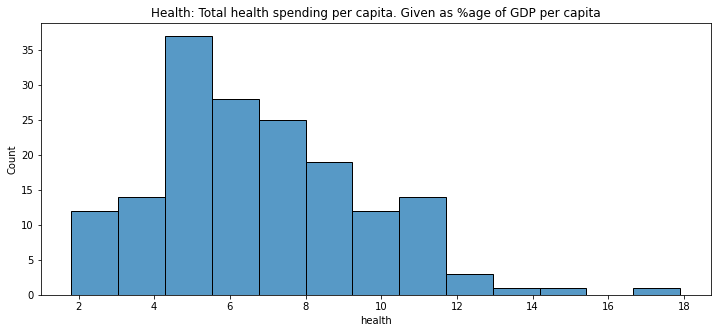

In [12]:
plt.figure(figsize=(12,5))
plt.title("Health: Total health spending per capita. Given as %age of GDP per capita")
ax = sns.histplot(data["health"])

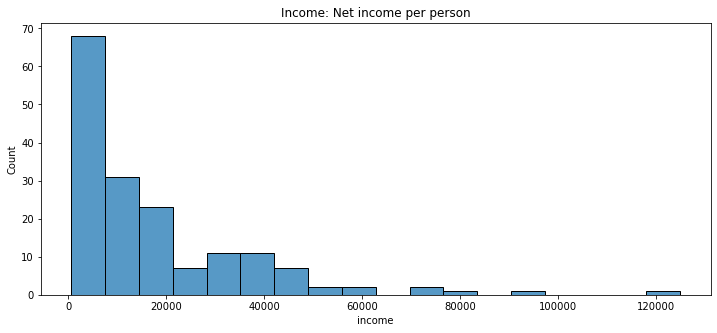

In [13]:
plt.figure(figsize=(12,5))
plt.title("Income: Net income per person")
ax = sns.histplot(data["income"])

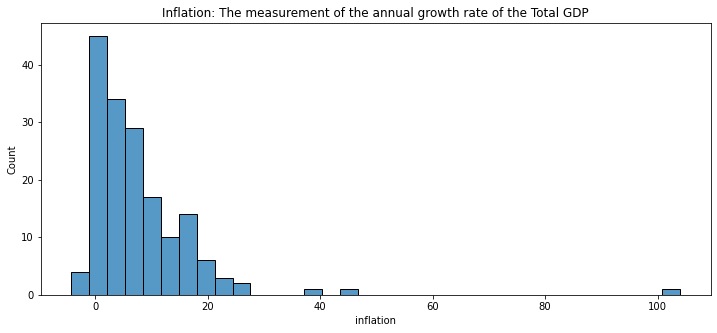

In [14]:
plt.figure(figsize=(12,5))
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(data["inflation"])

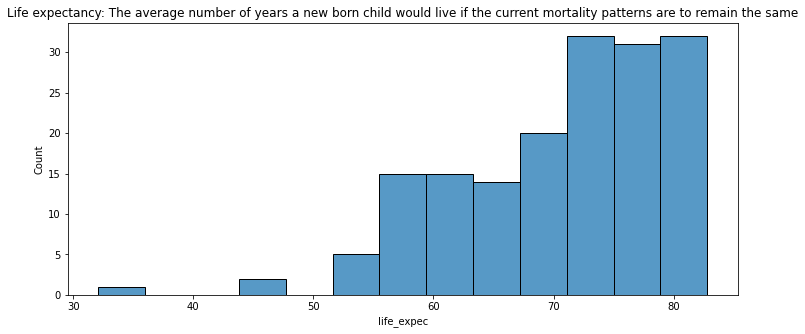

In [15]:
plt.figure(figsize=(12,5))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(data["life_expec"])

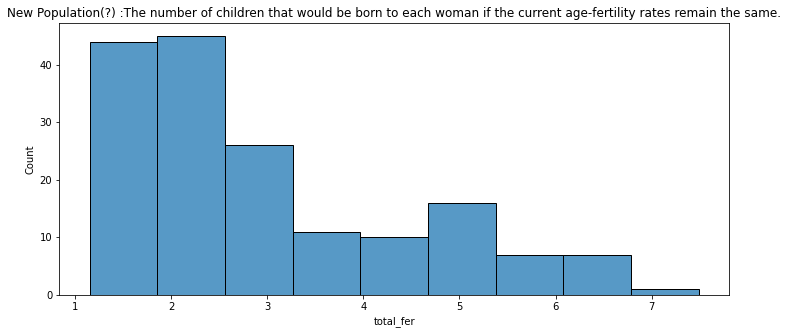

In [16]:
plt.figure(figsize=(12,5))
plt.title("New Population(?) :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(data["total_fer"])

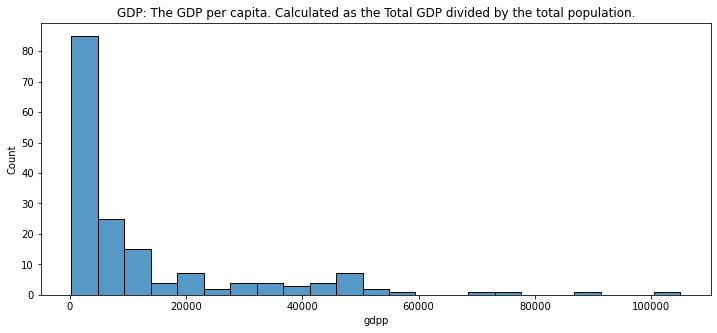

In [17]:
plt.figure(figsize=(12,5))
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(data["gdpp"])

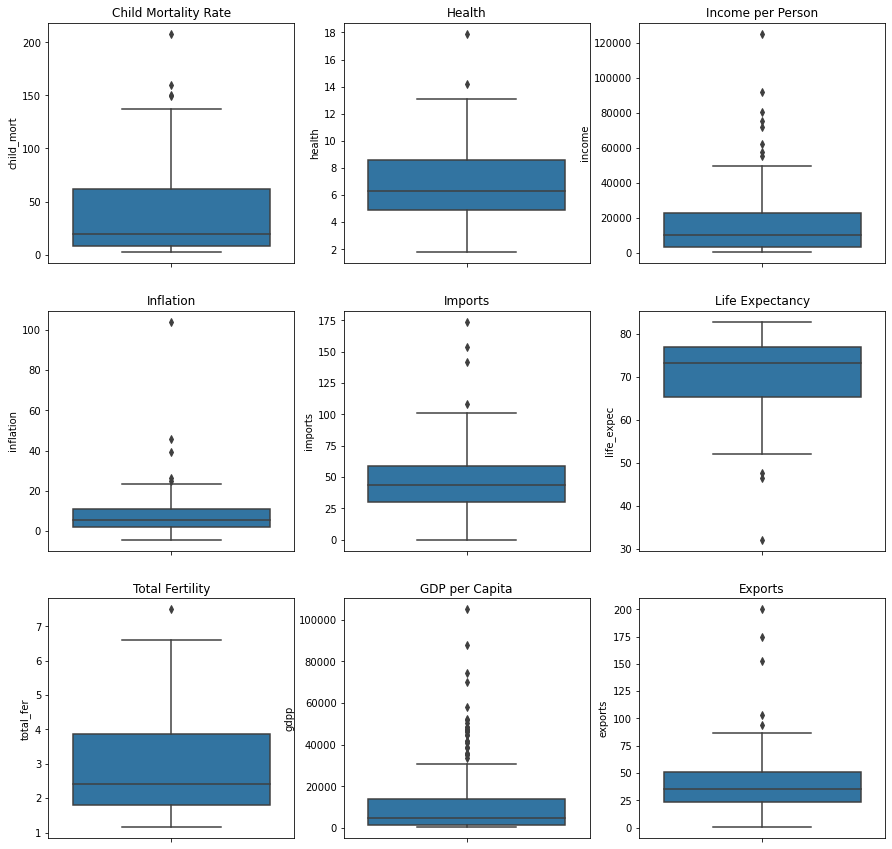

In [18]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=data.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=data.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=data.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=data.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=data.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=data.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

## Findings


small dataset

no missing values

no duplicate values

some outliers and skewed distribution

Looking at the data distribution we can see that there are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.

For the purpose of this analysis, outliers will not be removed since they could be considered very informative in that they could point out countries that are in critical condition and in need of help and also our dataset is very small (167 rows only).


## Correlation

<AxesSubplot:>

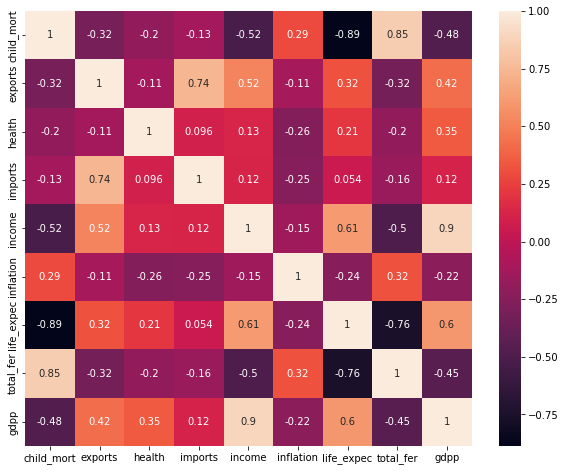

In [19]:
plt.figure(figsize=(10,8))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

From above we can conclude that:

gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated
whereas life_expec and child_mort are highly negative correlated

# Scaling Data

Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library
StandardScaler transform the data such the the mean will be 0 and variance will be 1.

In [20]:
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [21]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K-Means Clustering

Steps

1 First we initialize k points called means randomly

2 Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far

3 We repeat the process for a given number of iteartions and at the end,we have our clusters

To decide how many number of clusters consider we are going to use elbow method

E:\Program Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


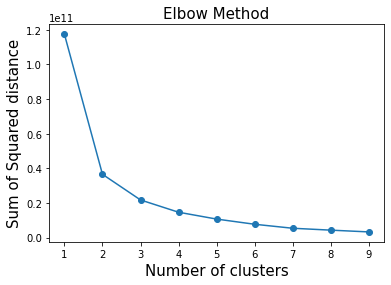

In [22]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters

In [23]:
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [24]:
pd.Series(kmeans.labels_).value_counts()

2    84
0    47
1    36
dtype: int64

In [25]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [27]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df1)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [28]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

# Visualization of clusters

E:\Program Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


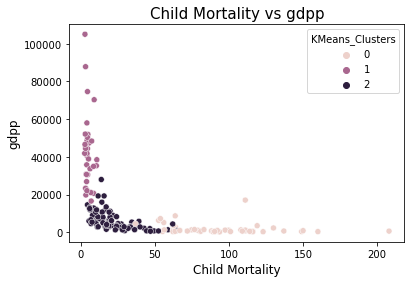

In [29]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

E:\Program Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


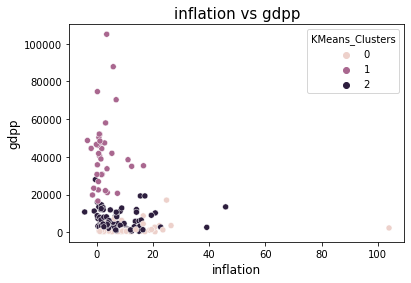

In [30]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that

1 Country having high child-mortality, low GDP per catia and low inflation is a under-developing country

2 Country having low child-mortality, high gdpp and high infaltion is the developed country

So here we conclude that

0 = under-developing country

2 = developing country

1 = developed country

In [31]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']


print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 47
Number of developing countries 84
Number of under-developing countries 36


In [32]:
#list of developed countries
list(developed)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

Let's check that is Pakistan is present in developing countries list

In [33]:
flag=0
for i in developing:
    if i == 'Pakistan':
        flag=1
        break
if flag == 1:
    print('Yes Pakistan is present in developing countries list')
else:
    print('No Pakistan is not present in developing countries list')

No Pakistan is not present in developing countries list


# Hierarchical Clustering

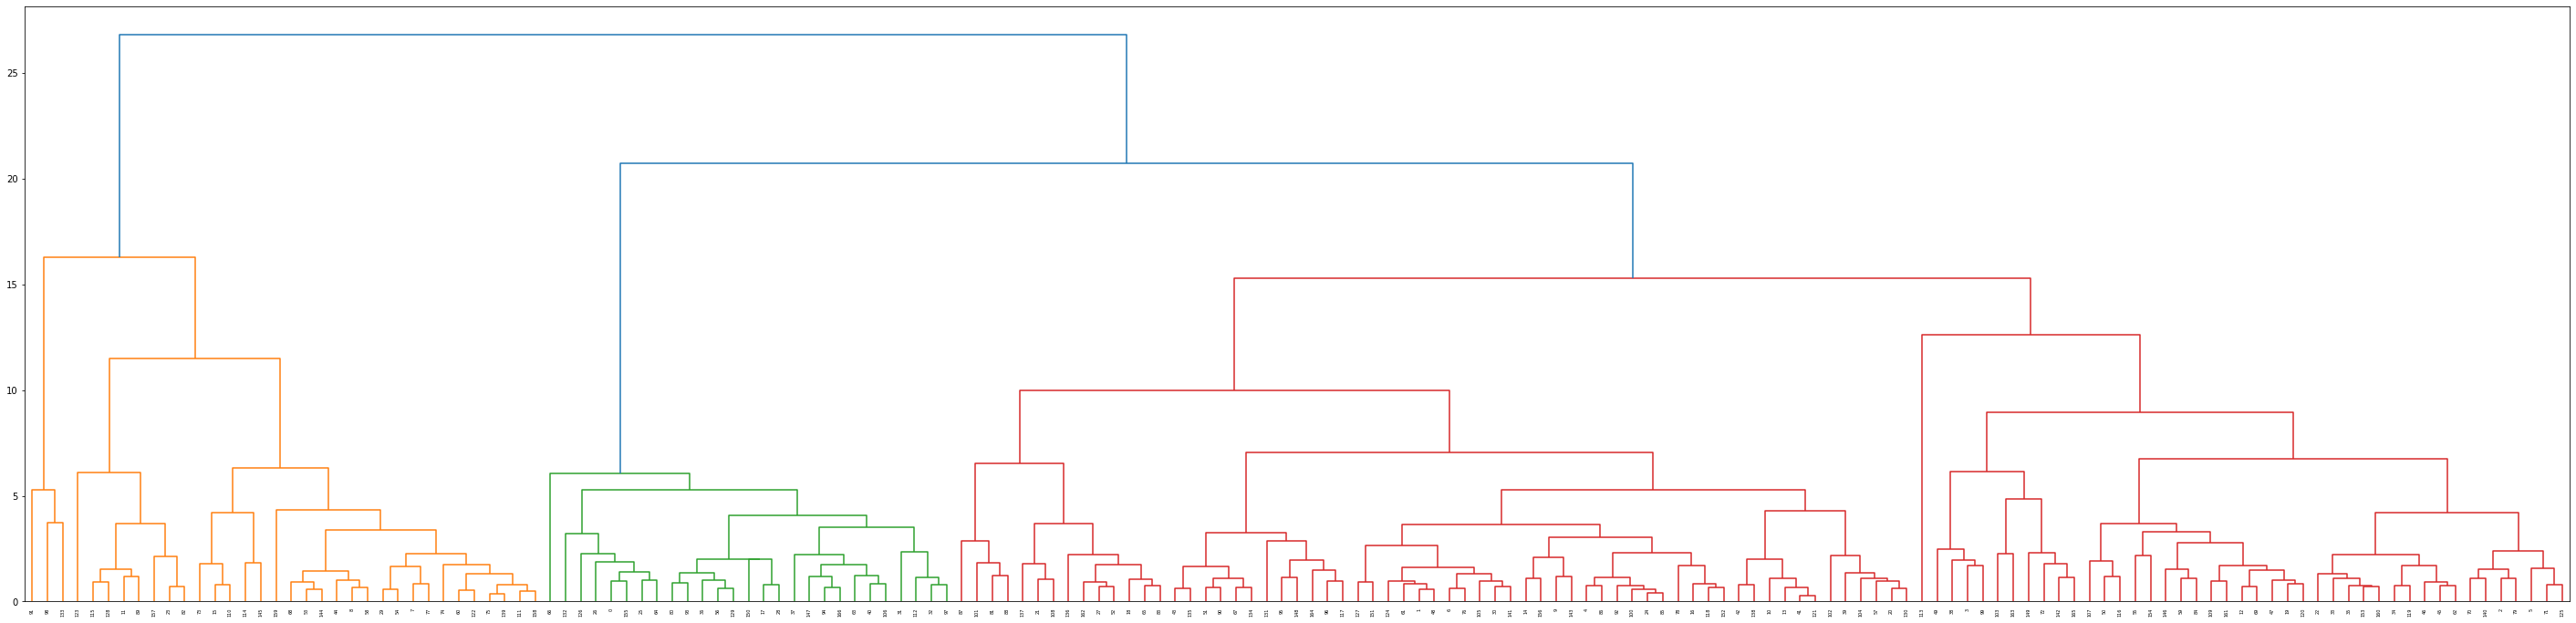

In [34]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.As we can see from dendogram 3 is the right no of clusters, so we are going to take 3 no of clusters

In [35]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [36]:
hcluster_df = pd.DataFrame(df1)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1


# Visualization hcluster

E:\Program Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


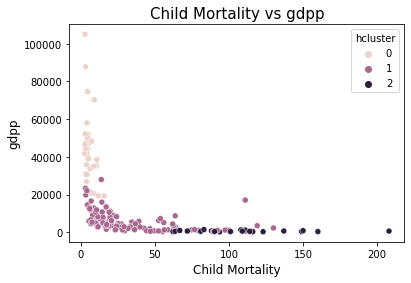

In [37]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_df['child_mort'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

E:\Program Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


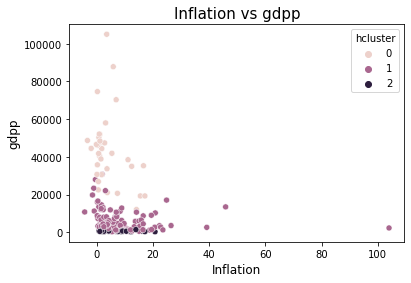

In [38]:
#visulazing hcluster results
sns.scatterplot(hcluster_df['inflation'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above we can conclude that:

0 = developed country

1 = developing country

2 = under-developing country

In [39]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of developed countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of developed countries 34
Number of developing countries 106
Number of under-developing countries 27


In [40]:
list(developed)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Libya',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Portugal',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']